In [1]:
cd C:\Users\tul18813\Desktop\BigGeo\AppDev\data

C:\Users\tul18813\Desktop\BigGeo\AppDev\data


In [2]:
import rasterio
import fiona

In [3]:
nlcd_file = 'nlcd_tcc_conus_2021_v2021-4.tif'
nlcd_dataset = rasterio.open(nlcd_file)

In [4]:
import geopandas as gpd

states_shapefile = 'states.shp'
states_gdf = gpd.read_file(states_shapefile)

In [23]:
state_name = input("Enter the name of the state: ")

# Filter the states GeoDataFrame based on the user input
selected_state = states_gdf[states_gdf['NAME'] == state_name]

Enter the name of the state:  Delaware


In [24]:
from rasterio.mask import mask

# Extract the geometry of the selected state
geometry = selected_state.geometry.values[0]

# Clip the NLCD dataset based on the geometry of the selected state
clipped_nlcd, _ = mask(nlcd_dataset, [geometry], crop=True)

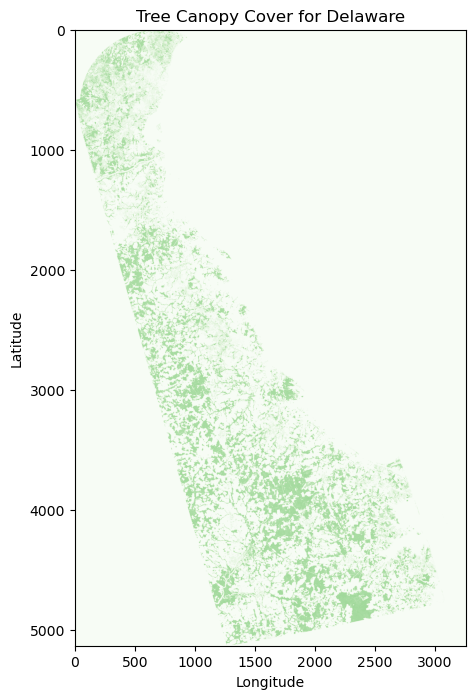

In [25]:
import matplotlib.pyplot as plt
from rasterio.plot import show

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Visualize the clipped NLCD data
show(clipped_nlcd, ax=ax, cmap='Greens')

# Add title
ax.set_title('Tree Canopy Cover for {}'.format(state_name))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()